In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [48]:
import pandas as pd

In [78]:
import numpy as np

In [50]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
import matplotlib.pyplot as plt

In [52]:
import seaborn as sns

In [55]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [58]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [62]:
# Make predictions
y_pred = dt_model.predict(X_test)

In [63]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

In [64]:
# Generate classification report
class_report = classification_report(y_test, y_pred, target_names=target_names)

In [65]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

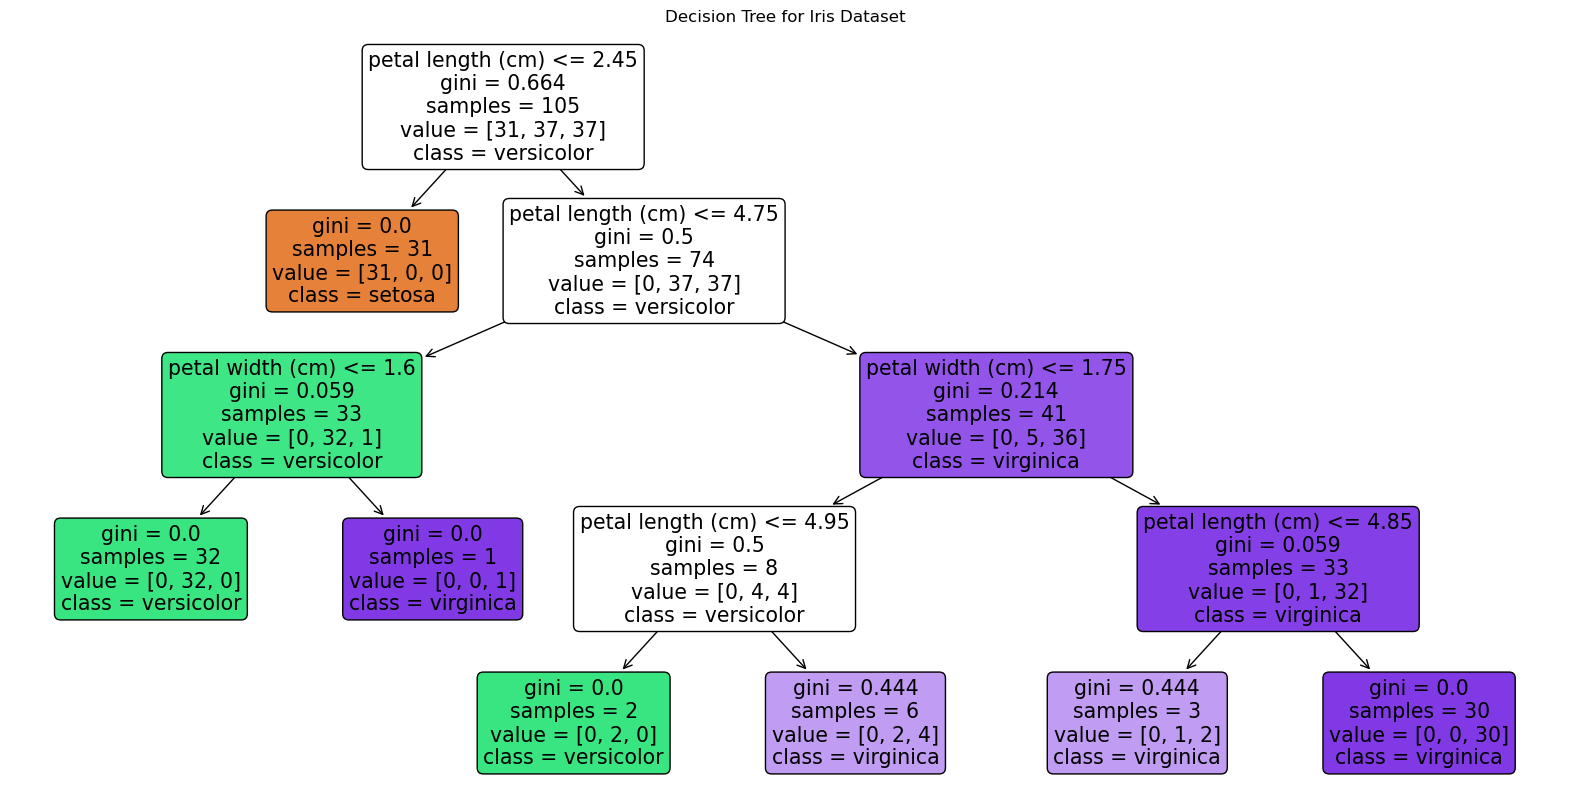

In [80]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
plt.title('Decision Tree for Iris Dataset')
plt.show()

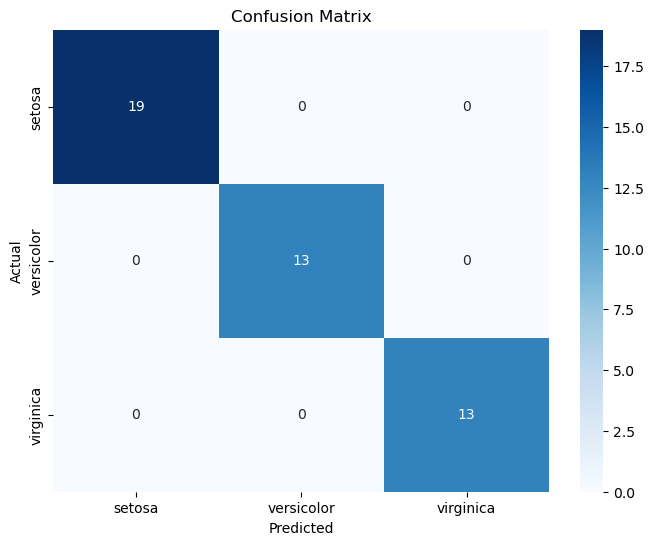

In [82]:
# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

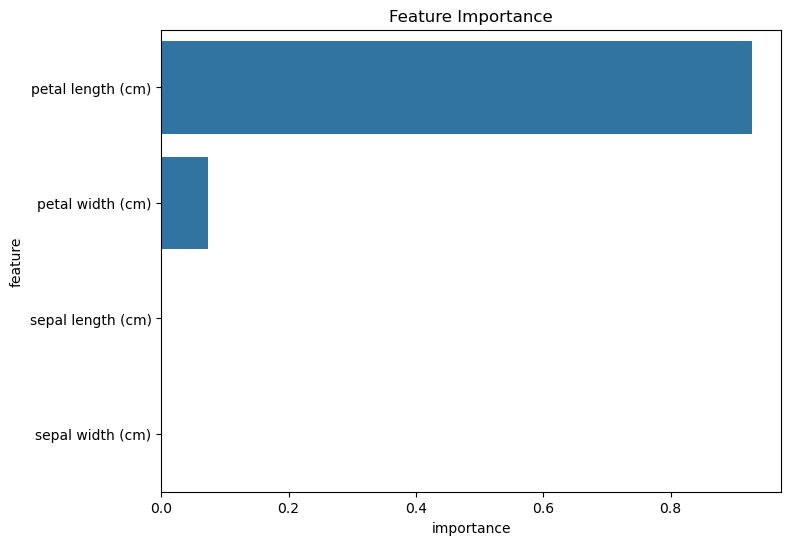

In [84]:
# Feature importance plot
feature_importance = pd.DataFrame({'feature': feature_names, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

In [90]:
# Print results
print(f"Model Accuracy: {accuracy*100:.2f}")
print("\nClassification Report:")
print(class_report)

Model Accuracy: 100.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [46]:
# Save key metrics to a text file
with open('model_metrics.txt', 'w') as f:
    f.write(f"Model Accuracy: {accuracy:.2f}\n\n")
    f.write("Classification Report:\n")
    f.write(class_report)